<a href="https://colab.research.google.com/github/Nasuz092/Tugas/blob/main/Sentimen_Analisis_Muse_Indo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROSES CLEANSING DATA**

In [2]:
!pip install nltk

In [3]:
#import modul
import pandas as pd
import numpy as np
import regex as re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Nasuz092/Tugas/main/YT%20Crawl%20Muse%20Indo.csv', sep=';')
df .head()

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2024-07-11T04:43:15Z,@PelurKelor,plagiat black clover lol,0
1,2024-07-11T04:36:40Z,@xiaoxi9561,Mengingatkan ku pada asta😅,0
2,2024-07-11T04:02:53Z,@kemedjuara9773,Motifasinya cuma betina 😂,0
3,2024-07-11T03:57:59Z,@herowahyudi6408,Judul anime,0
4,2024-07-11T03:57:57Z,@Ryxz.xx1,seru banget gilakkkk,0


In [5]:
df = df.dropna(subset=['textDisplay', 'likeCount'])

In [6]:
import re
import unicodedata

def remove_pattern(Text, pattern):
    r = re.findall(pattern, str(Text))
    for i in r:
        Text = re.sub(i, '', str(Text))
    return Text
df['remove_user'] = np.vectorize(remove_pattern)(df['textDisplay'], "@[\w]*")

In [7]:
def cleaning(Text):
    Text = re.sub(r"<a\s+href='https:\/\/www\.youtube\.com\/watch\?v=[^']+(&t=[0-9ms]+)?'>[^<]+<\/a>", "", Text)
    Text = re.sub(r"<a\s+href='(?:https?:\/\/)?(?:www\.)?youtube\.com[^']*(&t=[0-9ms]+)?'>[^<]+<\/a>", "", Text)
    Text = re.sub(r"<br\s*\/?>", "", Text)
    Text = Text.replace("&#39;", "")
    Text = re.sub(r"&lrm;", "", Text)
    Text = re.sub(r"&zwnj;", "", Text)
    Text = re.sub(r'\s&amp\s', ' ', Text)
    Text = re.sub(r'$\w*', '', Text)
    Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)
    Text = re.sub('"'," ", Text)
    Text = re.sub(r"\d+", " ", str(Text))
    Text = re.sub(r"[^\w\s]", " ", str(Text))
    Text = re.sub(r"\s+", " ", str(Text))
    Text = re.sub(r'#', '', Text)
    Text = re.sub(r'[^a-zA-z0-9]', ' ', str(Text))
    Text = re.sub(r'\s\s+', ' ', Text)
    Text = re.sub(r'^b[\s]+', '', Text)
    Text = re.sub(r'^link[\s]+', '', Text)
    Text = re.sub(r"<\/?[a-z]+>", "", Text)
    Text = re.sub(r"<a\s+[^>]*>", "", Text)
    return Text

def remove_emoji(Text):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', Text)

df['cleaning'] = df['remove_user'].apply(cleaning)

In [8]:
def tokenize_with_quotes(text):
    tokens = word_tokenize(text)
    tokens_with_quotes = ['"' + token + '"' for token in tokens]
    return tokens_with_quotes

df['tokenized_Content'] = df['textDisplay'].apply(lambda x: tokenize_with_quotes(x))
df.head(6)

,publishedAt,authorDisplayName,textDisplay,likeCount,remove_user,cleaning,tokenized_Content
0,2024-07-11T04:43:15Z,@PelurKelor,plagiat black clover lol,0,plagiat black clover lol,plagiat black clover lol,"[""plagiat"", ""black"", ""clover"", ""lol""]"
1,2024-07-11T04:36:40Z,@xiaoxi9561,Mengingatkan ku pada asta😅,0,Mengingatkan ku pada asta😅,Mengingatkan ku pada asta,"[""Mengingatkan"", ""ku"", ""pada"", ""asta😅""]"
2,2024-07-11T04:02:53Z,@kemedjuara9773,Motifasinya cuma betina 😂,0,Motifasinya cuma betina 😂,Motifasinya cuma betina,"[""Motifasinya"", ""cuma"", ""betina"", ""😂""]"
3,2024-07-11T03:57:59Z,@herowahyudi6408,Judul anime,0,Judul anime,Judul anime,"[""Judul"", ""anime""]"
4,2024-07-11T03:57:57Z,@Ryxz.xx1,seru banget gilakkkk,0,seru banget gilakkkk,seru banget gilakkkk,"[""seru"", ""banget"", ""gilakkkk""]"
5,2024-07-11T03:24:56Z,@donnypradana1229,Kacaaaauuuuu bangeet🔥,0,Kacaaaauuuuu bangeet🔥,Kacaaaauuuuu bangeet,"[""Kacaaaauuuuu"", ""bangeet🔥""]"


In [9]:
df.isnull().sum()

publishedAt          0
authorDisplayName    0
textDisplay          0
likeCount            0
remove_user          0
cleaning             0
tokenized_Content    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publishedAt        1376 non-null   object
 1   authorDisplayName  1376 non-null   object
 2   textDisplay        1376 non-null   object
 3   likeCount          1376 non-null   int64 
 4   remove_user        1376 non-null   object
 5   cleaning           1376 non-null   object
 6   tokenized_Content  1376 non-null   object
dtypes: int64(1), object(6)
memory usage: 75.4+ KB


In [11]:
df.to_csv('yt-comments-MuseIndo-clean.csv', index=False)

# **DOWNLOAD FILE HASIL CLEANSING**

In [ ]:
from google.colab import files

# Ganti 'nama_file.csv' dengan nama file CSV yang ingin di download
files.download('yt-comments-MuseIndo-clean.csv')

#**PROSES LABELLING**

In [17]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [18]:
import pandas as pd
import numpy as np
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df1 = pd.read_csv('/content/yt-comments-MuseIndo-clean.csv', sep=',')
df1 .head()

In [ ]:
df1 = df1.dropna(subset=['cleaning'])

In [ ]:
df1 = df1.drop_duplicates(['textDisplay'])

In [ ]:
df1.info()

In [139]:
# senti_indo = SentimentIntensityAnalyzer()

url = 'https://drive.google.com/file/d/1IJi6l0shAubdSA82j5fRPxYfg3EmjMTO/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# df_senti = pd.read_csv(path)
df_senti = pd.read_csv(path, sep=':', names=['word', 'value'])
# print(df_senti)

senti_dict = {}

for i in range (len(df_senti)):
  senti_dict[df_senti.iloc[i]['word']] = df_senti.iloc[i]['value']

In [140]:
senti_indo = SentimentIntensityAnalyzer()
senti_indo.lexicon.update(senti_dict)

In [141]:
def give_label(sentence):

  # Jika bukan angka, lakukan pelabelan sentimen menggunakan VADER
  senti_indo = SentimentIntensityAnalyzer()
  senti_indo.lexicon.update(senti_dict)
  nilai = senti_indo.polarity_scores(sentence)
  print(nilai)

  if nilai['compound'] >= 0.15:
    return "positif"
  elif nilai['compound'] <= -0.15:
    return "negatif"
  else:
    return "netral"

In [119]:
df1.head(10)

,publishedAt,authorDisplayName,textDisplay,likeCount,remove_user,cleaning,tokenized_Content,Label
0,2024-07-11T04:43:15Z,@PelurKelor,plagiat black clover lol,0,plagiat black clover lol,plagiat black clover lol,"['""plagiat""', '""black""', '""clover""', '""lol""']",positif
1,2024-07-11T04:36:40Z,@xiaoxi9561,Mengingatkan ku pada asta😅,0,Mengingatkan ku pada asta😅,Mengingatkan ku pada asta,"['""Mengingatkan""', '""ku""', '""pada""', '""asta😅""']",positif
2,2024-07-11T04:02:53Z,@kemedjuara9773,Motifasinya cuma betina 😂,0,Motifasinya cuma betina 😂,Motifasinya cuma betina,"['""Motifasinya""', '""cuma""', '""betina""', '""😂""']",positif
3,2024-07-11T03:57:59Z,@herowahyudi6408,Judul anime,0,Judul anime,Judul anime,"['""Judul""', '""anime""']",positif
4,2024-07-11T03:57:57Z,@Ryxz.xx1,seru banget gilakkkk,0,seru banget gilakkkk,seru banget gilakkkk,"['""seru""', '""banget""', '""gilakkkk""']",positif
5,2024-07-11T03:24:56Z,@donnypradana1229,Kacaaaauuuuu bangeet🔥,0,Kacaaaauuuuu bangeet🔥,Kacaaaauuuuu bangeet,"['""Kacaaaauuuuu""', '""bangeet🔥""']",positif
6,2024-07-11T03:14:58Z,@lofihiphopmix6956,danmachi versi animasi keren +++,0,danmachi versi animasi keren +++,danmachi versi animasi keren,"['""danmachi""', '""versi""', '""animasi""', '""keren...",positif
7,2024-07-11T02:36:19Z,@Iori-wi1pn,menyalaaaaaaaa,1,menyalaaaaaaaa,menyalaaaaaaaa,"['""menyalaaaaaaaa""']",positif
8,2024-07-11T02:22:08Z,@ardanakbar1270,Terbaaaiiik joooooon...,0,Terbaaaiiik joooooon...,Terbaaaiiik joooooon,"['""Terbaaaiiik""', '""joooooon""', '""...""']",positif
9,2024-07-11T01:47:16Z,@rahmatkayakkemarintapiagak4557,Anime macam apa ini😱,0,Anime macam apa ini😱,Anime macam apa ini,"['""Anime""', '""macam""', '""apa""', '""ini😱""']",positif


In [142]:
kal="good best epic battle damn boring"
label = give_label(kal)
print(label)

{'neg': 0.484, 'neu': 0.064, 'pos': 0.452, 'compound': 0.128}
netral


In [143]:
label_mc = []
for review in df1['cleaning']:
  get_label=give_label(review)
  label_mc.append(get_label)

{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.7184}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.375, 'pos': 0.625, 'compound': 0.7184}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.7184}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.625, 'neu': 0.375, 'pos': 0.0, 'compound': -0.7184}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.167, 'pos'

In [144]:
df1['Label'] = label_mc
df1

,publishedAt,authorDisplayName,textDisplay,likeCount,remove_user,cleaning,tokenized_Content,Label
0,2024-07-11T04:43:15Z,@PelurKelor,plagiat black clover lol,0,plagiat black clover lol,plagiat black clover lol,"['""plagiat""', '""black""', '""clover""', '""lol""']",positif
1,2024-07-11T04:36:40Z,@xiaoxi9561,Mengingatkan ku pada asta😅,0,Mengingatkan ku pada asta😅,Mengingatkan ku pada asta,"['""Mengingatkan""', '""ku""', '""pada""', '""asta😅""']",netral
2,2024-07-11T04:02:53Z,@kemedjuara9773,Motifasinya cuma betina 😂,0,Motifasinya cuma betina 😂,Motifasinya cuma betina,"['""Motifasinya""', '""cuma""', '""betina""', '""😂""']",negatif
3,2024-07-11T03:57:59Z,@herowahyudi6408,Judul anime,0,Judul anime,Judul anime,"['""Judul""', '""anime""']",netral
4,2024-07-11T03:57:57Z,@Ryxz.xx1,seru banget gilakkkk,0,seru banget gilakkkk,seru banget gilakkkk,"['""seru""', '""banget""', '""gilakkkk""']",positif
...,...,...,...,...,...,...,...,...
1371,2024-07-07T07:49:33Z,@AlfRedCh0,"Gw lihat si bagus, berharap aja dulu 😂",0,"Gw lihat si bagus, berharap aja dulu 😂",Gw lihat si bagus berharap aja dulu,"['""Gw""', '""lihat""', '""si""', '""bagus""', '"",""', ...",negatif
1372,2024-07-07T07:55:11Z,@Blood_Croot.,Ga seru gaada yang muat di karung,1,Ga seru gaada yang muat di karung,Ga seru gaada yang muat di karung,"['""Ga""', '""seru""', '""gaada""', '""yang""', '""muat...",positif
1373,2024-07-07T08:58:04Z,@AlvinRiski-x7u,bagus njir,0,bagus njir,bagus njir,"['""bagus""', '""njir""']",positif
1374,2024-07-07T02:54:39Z,@user-6ri4nfa3,ini anime apaan? bagi sinopsisnya dong,0,ini anime apaan? bagi sinopsisnya dong,ini anime apaan bagi sinopsisnya dong,"['""ini""', '""anime""', '""apaan""', '""?""', '""bagi""...",netral


In [153]:
df1[df1['Label'] == 'netral'].head(100)

,publishedAt,authorDisplayName,textDisplay,likeCount,remove_user,cleaning,tokenized_Content,Label
1,2024-07-11T04:36:40Z,@xiaoxi9561,Mengingatkan ku pada asta😅,0,Mengingatkan ku pada asta😅,Mengingatkan ku pada asta,"['""Mengingatkan""', '""ku""', '""pada""', '""asta😅""']",netral
3,2024-07-11T03:57:59Z,@herowahyudi6408,Judul anime,0,Judul anime,Judul anime,"['""Judul""', '""anime""']",netral
5,2024-07-11T03:24:56Z,@donnypradana1229,Kacaaaauuuuu bangeet🔥,0,Kacaaaauuuuu bangeet🔥,Kacaaaauuuuu bangeet,"['""Kacaaaauuuuu""', '""bangeet🔥""']",netral
7,2024-07-11T02:36:19Z,@Iori-wi1pn,menyalaaaaaaaa,1,menyalaaaaaaaa,menyalaaaaaaaa,"['""menyalaaaaaaaa""']",netral
8,2024-07-11T02:22:08Z,@ardanakbar1270,Terbaaaiiik joooooon...,0,Terbaaaiiik joooooon...,Terbaaaiiik joooooon,"['""Terbaaaiiik""', '""joooooon""', '""...""']",netral
...,...,...,...,...,...,...,...,...
213,2024-07-07T17:09:51Z,@busyrollathif4434,Joossssssss menyalah abangku🔥,1,Joossssssss menyalah abangku🔥,Joossssssss menyalah abangku,"['""Joossssssss""', '""menyalah""', '""abangku🔥""']",netral
216,2024-07-07T17:03:25Z,@ramamauludi2457,Epic sih ini mah bos,1,Epic sih ini mah bos,Epic sih ini mah bos,"['""Epic""', '""sih""', '""ini""', '""mah""', '""bos""']",netral
223,2024-07-07T16:54:41Z,@Dragonof31,"Bjirr gw ingat karakter sampingan di bc, asta",0,"Bjirr gw ingat karakter sampingan di bc, asta",Bjirr gw ingat karakter sampingan di bc asta,"['""Bjirr""', '""gw""', '""ingat""', '""karakter""', '...",netral
224,2024-07-07T16:51:08Z,@jembroot,Asta v2🗿,0,Asta v2🗿,Asta v,"['""Asta""', '""v2🗿""']",netral


In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361 entries, 0 to 1375
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publishedAt        1361 non-null   object
 1   authorDisplayName  1361 non-null   object
 2   textDisplay        1361 non-null   object
 3   likeCount          1361 non-null   int64 
 4   remove_user        1361 non-null   object
 5   cleaning           1361 non-null   object
 6   tokenized_Content  1361 non-null   object
 7   Label              1361 non-null   object
dtypes: int64(1), object(7)
memory usage: 128.0+ KB


# **VISUALISASI**

In [155]:
pos = (df1['Label'] == 'positif').sum()
neg = (df1['Label'] == 'negatif').sum()
neu = (df1['Label'] == 'netral').sum()
print('jumlah data sentimen positif:', pos, '\njumlah data sentimen negatif:', neg, '\njumlah data sentimen neutral:', neu)

jumlah data sentimen positif: 543 
jumlah data sentimen negatif: 271 
jumlah data sentimen neutral: 547


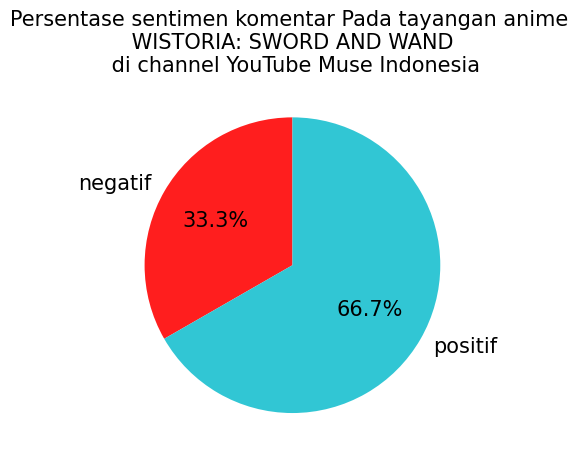

In [164]:
#Import Library
import matplotlib.pyplot as plt

# Data
labels = ['negatif', 'positif', 'neutral']
sizes = [neg, pos, neu]
colors = ['#FF1E1E', '#31C6D4', '#405D72']

# Membuat pie chart
plt.pie(sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize':15})

# Judul Pie Chart
plt.title('Persentase sentimen komentar Pada tayangan anime \n WISTORIA: SWORD AND WAND \n di channel YouTube Muse Indonesia', fontsize=15)

# Menampilkan Pie Chart
plt.axis()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

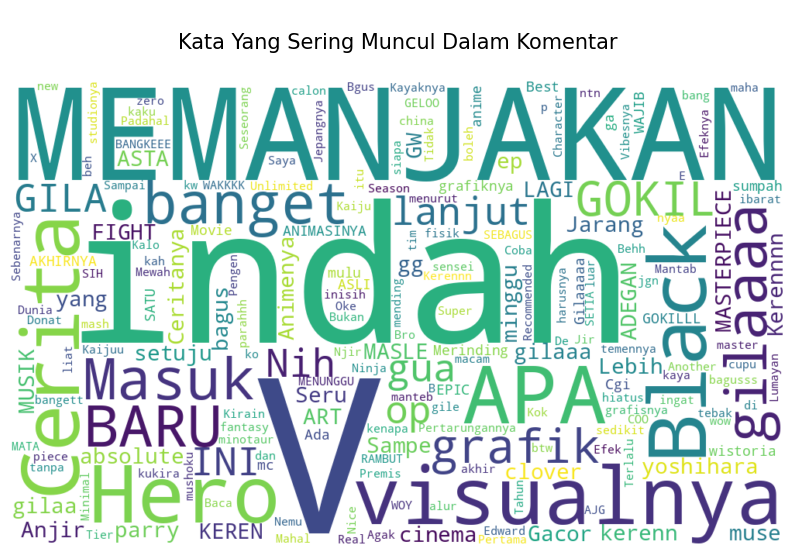

In [149]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_reviews = " ".join(review for review in df1['cleaning'])

# Remove duplicate words
all_reviews = " ".join(set(all_reviews.split()))


wordcloud= WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.title('\nKata Yang Sering Muncul Dalam Komentar\n', fontsize=15)
plt.show

# **LANJUTAN**

In [150]:
import pandas as pd

# Membaca data tabel komentar dari file CSV
data = pd.read_csv('/content/yt-comments-MuseIndo-clean.csv', sep=',')

# Menghitung jumlah tag untuk setiap nama
tag_counts = data['authorDisplayName'].value_counts()

# Menampilkan nama yang paling banyak di-tag
most_tagged = tag_counts.idxmax()
top_three_tagged = tag_counts.nlargest(3)

print("Tiga orang yang paling banyak di-tag:\n")
print(top_three_tagged)

Tiga orang yang paling banyak di-tag:

authorDisplayName
@sharise5034      6
@twokaizer2452    4
@alexx_979        4
Name: count, dtype: int64


In [98]:
import pandas as pd

# Membaca data tabel komentar dari file CSV
data = pd.read_csv('/content/yt-comments-MuseIndo-clean.csv', sep=',')

data[''] = data['textDisplay'].apply(cleaning)

# Mengurutkan data berdasarkan jumlah like
data_sorted = data.nlargest(3, 'likeCount')
print('Komentar dengan like terbanyak\n')
# Menampilkan tiga komentar dengan like terbanyak
for index, row in data_sorted.iterrows():
    user = row['authorDisplayName']
    komentar = row['cleaning']
    jumlah_like = row['likeCount']
    print('<><><><><><><><><><>')
    print()
    print('User:', user)
    print()
    print("Komentar:", komentar)
    print()
    print("Jumlah Like:", jumlah_like)
    print()
    print("--------------------")

Komentar dengan like terbanyak

<><><><><><><><><><>

User: @K.Fukoshi

Komentar: ABSOLUTE CINEMA Berasa banget fantasi cinematografi dan artnya modern Minimal sekarang genre fantasi emang harus digarap modelan gini Tentu didukung dengan cerita yang bagus 

Jumlah Like: 1759

--------------------
<><><><><><><><><><>

User: @rissky7560

Komentar: Apa ini halus banget animasinya Gila versi lain Asta ini mah

Jumlah Like: 516

--------------------
<><><><><><><><><><>

User: @seanalbani9751

Komentar: Ehh kok bagus dunianya mewah Visual effect grafis bgm scoring animasinya bagus wlupun plotnya menurut gw masih lumayan tamplete tapi dikerjain gak sembarangan dan seadanya overall bagus 

Jumlah Like: 305

--------------------


In [159]:
import textwrap

# Fungsi untuk membuat teks menjadi bold
def bold(text):
    return f"\033[1m{text}\033[0m"

# Mengurutkan data berdasarkan jumlah like
data_sorted = df1.nlargest(3, 'likeCount')
print('Komentar dengan like terbanyak\n')

# Menampilkan tiga komentar dengan like terbanyak
for index, row in data_sorted.iterrows():
    user = row['authorDisplayName']
    komentar = row['cleaning']
    jumlah_like = row['likeCount']
    # Check if 'Label' column exists before accessing it
    if 'Label' in row:
        sentimen = row['Label']

    # Membungkus komentar agar tidak terlalu panjang dalam satu baris
    wrapped_komentar = textwrap.fill(komentar, width=50)

    # Menampilkan data dengan format string yang rapi
    print('<><><><><><><><><><>')
    print(f"User        : {user}")
    print("Komentar    :")
    print(bold(wrapped_komentar))  # Membuat komentar menjadi bold
    print(f"Jumlah Like : {jumlah_like}")
    print(f"Label Sentimen : {sentimen}") # Display sentiment if available
    print('<><><><><><><><><><>')
    print()

Komentar dengan like terbanyak

<><><><><><><><><><>
User        : @rissky7560
Komentar    :
Apa ini halus banget animasinya Gila versi lain
Asta ini mah
Jumlah Like : 516
Label Sentimen : positif
<><><><><><><><><><>

<><><><><><><><><><>
User        : @seanalbani9751
Komentar    :
Ehh kok bagus dunianya mewah Visual effect grafis
bgm scoring animasinya bagus wlupun plotnya
menurut gw masih lumayan tamplete tapi dikerjain
gak sembarangan dan seadanya overall bagus
Jumlah Like : 305
Label Sentimen : positif
<><><><><><><><><><>

<><><><><><><><><><>
User        : @kholilmuluk5494
Komentar    :
meskipun alur cerita dah banyak yang kayak gini
tapi karna animasinya bagus jadi kebawa di cerita
Jumlah Like : 201
Label Sentimen : positif
<><><><><><><><><><>

